In [9]:
import requests as r #Biblioteca de requisitos para http

In [10]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url) #resp: Variavel de resposta, r.get: biblioteca onde a url será armazenada

In [11]:
resp.status_code

200

In [12]:
raw_data = resp.json() #Dados da Api armazenado em raw.data; .json(): formato de transmissao de dados utilizado pela API

In [13]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [14]:
final_data = [] #Variavel que armazenará só as 5 variaveis utilizadas
for obs in raw_data:#Para cada uma das observações encontradas nos dados brutos
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'],obs['Date']]) #Adicionando a final_data as 5 variaveis

In [15]:
final_data.insert(0, ['Confirmados', 'Mortes', 'Recuperados', 'Ativos','Data'])

In [16]:
CONFIRMADOS = 0 #Atribuição de cada variavel a um numero
MORTES = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [17]:
for i in range(1, len(final_data)) :               #Procura a partir da posição 1 na lista de listas e para na posição 9
    final_data[i][DATA] = final_data[i][DATA][:10]

In [18]:
import datetime as dt  #Biblioteca para padronização de data e tempo

In [19]:
import csv

In [20]:
with open('brasil-covid19.csv', 'w') as file: #Criação de um novo arquivo onde serão armazenada novos dados
    writer = csv.writer(file)
    writer.writerows(final_data)

In [21]:
for i in range(1, len(final_data)): #Procurar na lista de listas a partir da posição 1(valor valido)
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d') #na posição DATA converter para formato data e fazer parcing do valor de str para tipo date(ANO-Mes-dia)
        

In [25]:
final_data

[['Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

In [30]:
def get_datasets(y, labels):          #função que irá executar os graficos a partir dos dados 
    if type(y[0]) == list:
        datasets =[]
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data' : y[i]
            })
        return datasets
    else:
        return[
            {
                'label': labels[0],
                'data' : y
            }
    ]

In [31]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title': title,
        'display' : display
    }

In [32]:
def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type' : kind,
        'data' : {
        'labels': x,
        'datasets': datasets
    },
    'options' : options
} 
    
    return chart

In [33]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [34]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)   

In [6]:
!pip install pillow

In [35]:
from PIL import Image
from IPython.display import display

In [36]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

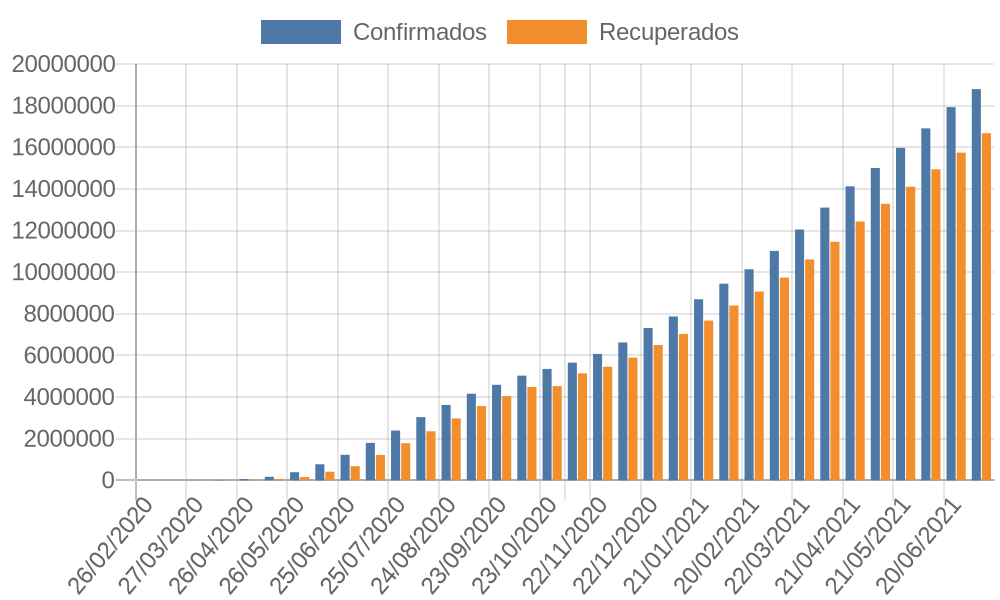

In [37]:
y_data_1 = []
for obs in final_data[1::15]:
    y_data_1.append(obs[CONFIRMADOS])
    
y_data_2 = []
for obs in final_data[1::15]:
    y_data_2.append(obs[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']     

x = []
for obs in final_data[1::15]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title ='Gráfico Confirmados x Recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')    

In [38]:
from urllib.parse import quote

In [39]:
def get_api_qrcode(link): #função para criar qrcode
    text = quote(link) #parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

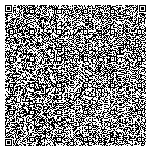

In [40]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')